In [1]:
!pip install biopython

# Exploring Biopython Documentation

Biopython provides extensive documentation that serves as a valuable resource for understanding its modules, functions, and usage. Here's a step-by-step guide on how to explore the documentation for a specific module, using the `Bio.Seq` module as an example:

1. **Visit the Documentation:**
   - Go to the [Biopython Documentation](https://biopython.org/wiki/Documentation).
   - Navigate to the "Biopython API" section.

2. **Locate the `Bio.Seq` Module:**
 
3. **Explore Module Functions:**
   - Click on the `Bio.Seq` module link to access its documentation.
   - Explore the functions provided by the module, such as `Seq()`, `translate()`, etc.

4. **Check Function Parameters:**
   - Click on a specific function to view its documentation.
   - Check the function's parameters, return values, and usage examples.



## Task 1:

- Import the `Seq` class from `Bio.Seq` to work with biological sequences.
- Create a DNA sequence and display it.
- Access individual bases of the sequence and demonstrate slicing.
- Concatenate sequences to show how it can be done with Biopython.
- Calculate GC-content using `Bio.SeqUtils`

In [5]:
# Import the Seq class from Biopython
from Bio.Seq import Seq
from Bio.SeqUtils import gc_fraction

# Create a DNA sequence
dna_sequence = Seq("TCTTGTATTGAGAACTGTGAATAAATTAGTTAATTTGTCAAT")

# Display the sequence
print("DNA Sequence:", dna_sequence)

# Accessing elements of the sequence
print("First base:", dna_sequence[0])
print("Last base:", dna_sequence[-1])

# Slicing the sequence
sub_sequence = dna_sequence[2:6]
print("Sliced sequence:", sub_sequence)

# Concatenation of sequences
concatenated_sequence = dna_sequence + Seq("GATTACA")
print("Concatenated sequence:", concatenated_sequence)

print("GC-content:", gc_fraction(concatenated_sequence))


DNA Sequence: TCTTGTATTGAGAACTGTGAATAAATTAGTTAATTTGTCAAT
First base: T
Last base: T
Sliced sequence: TTGT
Concatenated sequence: TCTTGTATTGAGAACTGTGAATAAATTAGTTAATTTGTCAATGATTACA
GC-content: 0.24489795918367346


## Task2:

- Use the `transcribe()` method to convert DNA to RNA.
- Use the `translate()` method to convert RNA to protein.



In [7]:
# Transcribe DNA to RNA
rna_sequence = dna_sequence.transcribe()
print("RNA Sequence:", rna_sequence)

# Translate RNA to protein
protein_sequence = rna_sequence.translate()
print("Protein Sequence:", protein_sequence)


# Transcribe DNA to RNA
aminoacid_sequence = dna_sequence.translate()
print("Protein Sequence2:", aminoacid_sequence)


RNA Sequence: UCUUGUAUUGAGAACUGUGAAUAAAUUAGUUAAUUUGUCAAU
Protein Sequence: SCIENCE*IS*FVN
Protein Sequence2: SCIENCE*IS*FVN


## Task 3:
- Import `SeqIO` from Biopython for reading and writing sequence files.
- Write the DNA sequence to a FASTA file using `SeqIO.write`.
- Read sequences from the saved FASTA file using `SeqIO.parse` and print them.

In [9]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Create a SeqRecord with a specific identifier and description
record = SeqRecord(Seq("ATCGTAGCTAG"), id="sequence_1", description="Example DNA sequence")
print(record.description)
# Write the SeqRecord to a FASTA file
SeqIO.write(record, "example.fasta", "fasta")
print("Sequence written to example.fasta")

# Read sequences from the FASTA file
fasta_sequences = SeqIO.parse("example.fasta", "fasta")
for record in fasta_sequences:
    print("Read sequence from file:")
    print("ID:", record.id)
    print("Description:", record.description)
    print("Sequence:", record.seq)


Example DNA sequence
Sequence written to example.fasta
Read sequence from file:
ID: sequence_1
Description: sequence_1 Example DNA sequence
Sequence: ATCGTAGCTAG


## Task 4:
- Import `Entrez` module for accessing NCBI databases.
- Set your email address to identify yourself to NCBI.
- Use `Entrez.efetch` to retrieve a GenBank record by accession number.
- Read the GenBank record using `SeqIO.read` and display relevant information.

In [10]:
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord


# Provide your email address to identify yourself to NCBI
Entrez.email = "your_email@example.com"

# Fetch data from NCBI using accession number
accession_number = "NM_001301717"  # Example accession number
handle = Entrez.efetch(db="nucleotide", id=accession_number, rettype="gb", retmode="text")
genbank_record = SeqIO.read(handle, "genbank")
handle.close()

# Display information from the GenBank record
print("Accession:", genbank_record.id)
print("Description:", genbank_record.description)
print("Sequence length:", len(genbank_record.seq))
print("Sequence:", genbank_record)

SeqIO.write(genbank_record, "ncbi.fasta", "fasta")
SeqIO.write(genbank_record, "ncbi.gb", "genbank")

Accession: NM_001301717.2
Description: Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
Sequence length: 2191
Sequence: ID: NM_001301717.2
Name: NM_001301717
Description: Homo sapiens C-C motif chemokine receptor 7 (CCR7), transcript variant 4, mRNA
Number of features: 10
/molecule_type=mRNA
/topology=linear
/data_file_division=PRI
/date=12-NOV-2024
/accessions=['NM_001301717']
/sequence_version=2
/keywords=['RefSeq']
/source=Homo sapiens (human)
/organism=Homo sapiens
/taxonomy=['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo']
/references=[Reference(title='C-C chemokine receptor type 7 (CCR7) regulates hepatic CD8 + T cell homeostasis and response to acute liver injury', ...), Reference(title='CCR7/DUSP1 signaling Axis mediates iCAF to regulates head and neck squamous cell carcinoma growth', ...), Reference(title='C-C Chem

1

## Task 5:
- Create two DNA sequences for alignment.
- Define a custom scoring matrix with match score, mismatch penalty, and gap penalty.
- Use `pairwise2.align.globalms` for global alignment with custom scoring.
- Display the aligned sequences and the alignment score with custom scoring.

In [11]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

seq1 = Seq("ATCGTAGCTAG")
seq2 = Seq("ATCGTACCTAG")

# Define custom scoring matrix for matches and mismatches
match_score = 2
mismatch_penalty = -1
gap_penalty = -0.5

# Perform pairwise sequence alignment with custom scoring
alignments_custom = pairwise2.align.globalms(seq1, seq2, match_score, mismatch_penalty, gap_penalty, gap_penalty, one_alignment_only=True)

# Display the alignment result with custom scoring
alignment_custom = alignments_custom[0]
print("Aligned Sequence 1:", alignment_custom.seqA)
print("Aligned Sequence 2:", alignment_custom.seqB)
print("Alignment Score with Custom Scoring:", alignment_custom.score)
print("")
print("BLAST-type alignment")
for a in alignments_custom:
    print(format_alignment(*a))

Aligned Sequence 1: ATCGTAGC-TAG
Aligned Sequence 2: ATCGTA-CCTAG
Alignment Score with Custom Scoring: 19.0

BLAST-type alignment
ATCGTAGC-TAG
|||||| | |||
ATCGTA-CCTAG
  Score=19


/home/dmm2017/miniconda3/envs/Platinum/lib/python3.12/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## Task 6: 
- Import `PDBParser` from Biopython for parsing PDB files.
- Download a sample PDB file from the RCSB PDB database (https://files.rcsb.org/download/6YYT.pdb).
- Parse the PDB file using the `PDBParser` and display basic information about the structure.

In [12]:
from Bio.PDB import PDBParser

# Download a sample PDB file (e.g., hemoglobin structure)
pdb_url = "https://files.rcsb.org/download/6YYT.pdb"
pdb_filename = "6YYT.pdb"

import urllib.request
urllib.request.urlretrieve(pdb_url, pdb_filename)
print(f"Downloaded PDB file: {pdb_filename}")

# Parse the PDB file
parser = PDBParser(QUIET=True)
structure = parser.get_structure("Hemoglobin", pdb_filename)

# Display information about the structure
print("Structure ID:", structure.id)
print("Number of models:", len(structure))
print("Number of chains:", len(list(structure[0])))

Downloaded PDB file: 6YYT.pdb
Structure ID: Hemoglobin
Number of models: 1
Number of chains: 8


## Task 7:
- Import `Phylo` from Biopython for parsing and drawing Phylogenies
- Create Newick tree and draw it

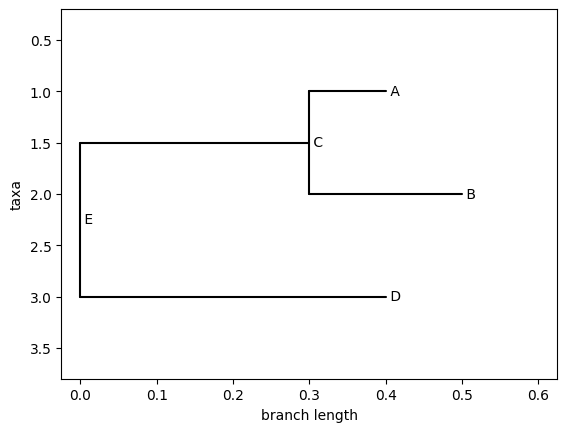

In [13]:
!pip install matplotlib
from Bio import Phylo
from io import StringIO


# Create a basic Newick format string for a small tree
newick_tree = "((A:0.1,B:0.2)C:0.3,D:0.4)E;"
handle = StringIO(newick_tree)
# Parse the Newick format tree
tree = Phylo.read(handle, "newick")

# Draw the phylogenetic tree
Phylo.draw(tree)

# Exercise: DNA Sequence Motif Search
Problem Statement:

You are given a DNA sequence and a motif. Your task is to write a Python function that finds all occurrences of the motif within the DNA sequence. Additionally, the function should return the positions (indices) of the motif in the DNA sequence.

Write a Python function named find_motif with the following signature:

In [5]:
from Bio.SeqUtils import nt_search
from Bio.motifs import Instances

def find_motif(dna_sequence, motif):
    """
    Find all occurrences of a motif in a DNA sequence.

    Parameters:
    - dna_sequence (str): The input DNA sequence.
    - motif (str): The motif to search for.

    Returns:
    - List of integers: Positions (indices) of motif occurrences in the DNA sequence.
    """
    sequence = Seq(dna_sequence)

    positions = nt_search(str(sequence), motif)

    return positions

def find_motif_slow(dna_sequence, motif):
    positions = []
    motif_length = len(motif)
    sequence_length = len(dna_sequence)

    for i in range(sequence_length - motif_length + 1):
        if dna_sequence[i:i + motif_length] == motif:
            positions.append(i)

    return positions
